In [ ]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments\src')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

from IPython.display import display, Markdown, Latex
from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re
import json
import pathlib
import glob
import math

import spacy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import plotly as py

from models.cascades import *
from viz.cascades import *
from utils.misc import progress

py.offline.init_notebook_mode()
np.random.seed(0)

In [ ]:
plt.rcParams['figure.figsize'] = 16,10

In [ ]:
from experiments.block_entropy import BlockEntropy_StimulusResponse as Experiment
ROOT = pathlib.Path().resolve()
DATA_ROOT = ROOT.parent  / 'data' / 'analytics'
print(ROOT)
print(DATA_ROOT)

Experiment.clear_missing_results(DATA_ROOT)

In [ ]:
BLOCK_ENT = '$H(k)$'
EXCESS_ENT = '$\eta^{(k)}$'
ENT_RATE = '$h^{(k)}$'

In [ ]:
results = Experiment.load_all_results(DATA_ROOT, run_col_name='Document')
results = results['persubj']
results.pop('Unnamed: 0')
results.head()

In [6]:
from experiments.block_entropy import BlockEntropy_StimulusResponse as Experiment
ROOT = pathlib.Path().resolve()
DATA_ROOT = ROOT.parent  / 'data' / 'analytics'
print(ROOT)
print(DATA_ROOT)

Experiment.clear_missing_results(DATA_ROOT)
results = Experiment.load_all_results(DATA_ROOT, run_col_name='Document')
results = results['persubj']
#results = results.assign(Subject=np.random.choice(['Foo','Bar'], size=(len(results.index),))).set_index('Subject', append=True)
results.head()

C:\Users\kevin\Documents\Workspace\psylit-experiments\src
C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics


,,$H(k)$,Category,Feature,Subject,Unnamed: 0,k
,Document,,,,,,
0,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",0.207817,Other,Unknown,NARRATOR,0,1
1,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",0.574444,Other,Unknown,NARRATOR,1,3
2,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",0.932323,Other,Unknown,NARRATOR,2,5
3,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",1.276263,Other,Unknown,NARRATOR,3,7
4,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",1.603014,Other,Unknown,NARRATOR,4,9


In [ ]:
from models.cascades import MultiCascades, FEATURE_TRANSFORMERS
from utils.io import file_parts

CASC_ROOT = ROOT.parent / 'data' / 'processed' / 'train'
casc_files = list(CASC_ROOT.glob('**/*.csv*'))
print(len(casc_files), 'cascade files')
docs = set(results.index.get_level_values('Document').unique())
print(len(docs), 'docs')
casc_files = [p for p in casc_files if file_parts(p)[0] in docs]
mc = MultiCascades.from_csvs(casc_files, document_col='Document')

In [18]:
mc

neg  \
Subject        t     Document                                             
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
...                                                                 ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   

                                                                    L_valence  \
Subject        t     Document                                                   
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
...                                                                       ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   

                                                                    L_negative  \
Subject        t     Document                                                    
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           1   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
...                                                                        ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel               1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   

                                                                    L_fear  \
Subject        t     Document                                                
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
...                                                                    ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel           1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30452 EN_1930_Mansfi

In [11]:
transform_function = FEATURE_TRANSFORMERS['StimulusResponse']
mcsr = transform_function(mc)
mcsr

Category                                                             Other  \
Feature                                                            Unknown   
Subject        t     Document                                                
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
...                                                                    ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   

Category                                                           Response  \
Feature                                                               Anger   
Subject        t     Document                                                 
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel        0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel        0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel        0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel        0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel        0   
...                                                                     ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel            0   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel            0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel            0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel            0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel            0   

Category                                                                         \
Feature                                                            Anticipation   
Subject        t     Document                                                     
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel            0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel            0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel            0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel            0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel            0   
...                                                                         ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel                0   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel                0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel                0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel                0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel                0   

Category                                                                    \
Feature                                                            Arousal   
Subject        t     Document                                                
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
...          

In [25]:
from models.cascades import DaskMultiCascades, FEATURE_TRANSFORMERS
from utils.io import file_parts

CASC_ROOT = ROOT.parent / 'data' / 'processed' / 'train'
casc_files = list(CASC_ROOT.glob('**/*.csv*'))
print(len(casc_files), 'cascade files')
docs = set(results.index.get_level_values('Document').unique())
print(len(docs), 'docs')
casc_files = [p for p in casc_files if file_parts(p)[0] in docs]
dmc = DaskMultiCascades.from_csvs(casc_files, document_col='Document')
dmc

150 cascade files
150 docs


In [35]:
ns = pd.Series(mcsr.casc.groupby(level=['Document', 'Subject']).size(), name='n')
ns

Document                                                    Subject       
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel               NARRATOR           6603
                                                            READER             6603
EN_1771_Smollett,Tobias_TheExpedictionofHenryClinker_Novel  NARRATOR          23427
                                                            READER            23427
                                                            captain           23427
                                                                              ...  
EN_1930_Mansfield,Katherine_TheAloe_Novel                   NARRATOR           5075
                                                            READER             5075
                                                            beryl              5075
                                                            linda              5075
                                                            mrs. fairfield     5075
N

In [ ]:
mcsr

In [12]:
display(Markdown("""## Average frequency per sample"""))
print(f"{len(mcsr.subjects)} subjects")
print(f"{mcsr.n_rows} data points ({mcsr.n_rows / len(mcsr.subjects)} / subject)")

freq = mcsr.casc.groupby(level=['Document', 'Subject']).sum()
freq.mean()

## Average frequency per sample

923 subjects
43916869 data points (47580.57313109426 / subject)


Category  Feature     
Other     Unknown           628.698350
Response  Anger              30.292409
          Anticipation       55.716172
          Arousal           202.441584
          Disgust            18.941914
          Dominance         330.972937
          Fear               37.889769
          Joy                45.081848
          Sadness            36.912871
          Surprise           32.426403
          Trust              60.758416
          Valence           394.397360
Stimulus  Anger            2011.075248
          Anticipation     3373.496370
          Arousal         11148.385479
          Disgust          1393.583498
          Dominance       17701.883828
          Fear             2507.796700
          Joy              2832.851485
          Sadness          2454.376238
          Surprise         1982.599340
          Trust            3804.460066
          Valence         20965.869967
dtype: float64

In [36]:
df = results.droplevel(0).set_index(['Subject'], append=True)
df = df.merge(ns, how='left', on=['Document', 'Subject'])
df[ENT_RATE] = df[BLOCK_ENT] / df.k
df[EXCESS_ENT] = df[BLOCK_ENT] - df.k * df[ENT_RATE]
#df['n'] = df.groupby(level=[0,1]).size().reset_index()
m = 2
alp_len = 2**m
log_alp_len = math.log(alp_len, 2)
left=df.n * df[BLOCK_ENT]
right=df.k * alp_len ** df.k * log_alp_len

df = df.assign(
    reliability=left.ge(right).replace({True: 'Reliable', False: 'Unreliable'}).astype('category'),
)
reliable = df.reliability == 'Reliable'
df.head()

$H(k)$ Category  \
Document                                      Subject                       
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR  0.207817    Other   
                                              NARRATOR  0.574444    Other   
                                              NARRATOR  0.932323    Other   
                                              NARRATOR  1.276263    Other   
                                              NARRATOR  1.603014    Other   

                                                        Feature  Unnamed: 0  \
Document                                      Subject                         
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR  Unknown           0   
                                              NARRATOR  Unknown           1   
                                              NARRATOR  Unknown           2   
                                              NARRATOR  Unknown           3   
                                              NARRATOR  Unknown           4   

                                                        k     n  $h^{(k)}$  \
Document                                      Subject                        
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR  1  6603   0.207817   
                                              NARRATOR  3  6603   0.191481   
                                              NARRATOR  5  6603   0.186465   
                                              NARRATOR  7  6603   0.182323   
                                              NARRATOR  9  6603   0.178113   

                                                        $\eta^{(k)}$  \
Document                                      Subject                  
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR  0.000000e+00   
                                              NARRATOR  0.000000e+00   
                                              NARRATOR -1.110223e-16   
                                              NARRATOR  0.000000e+00   
                                              NARRATOR  0.000000e+00   

                                                       reliability  
Document                                      Subject               
EN_1771_Mackenzie,Henry_TheManofFeeling_Novel NARRATOR    Reliable  
                                              NARRATOR    Reliable  
                                              NARRATOR  Unreliable  
                                              NARRATOR  Unreliable  
                                              NARRATOR  Unreliable

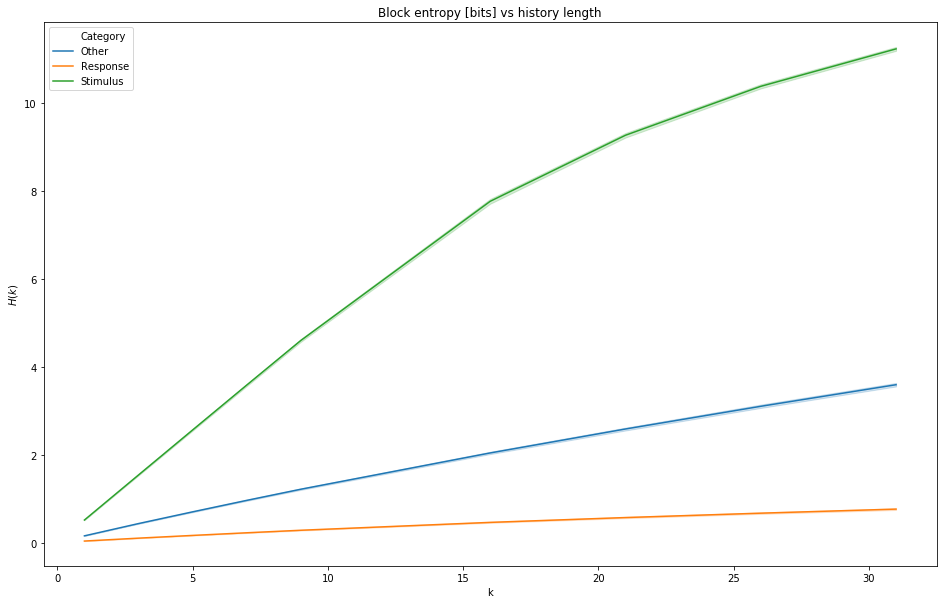

In [38]:
#fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Category')
plt.title('Block entropy [bits] vs history length')
plt.show()

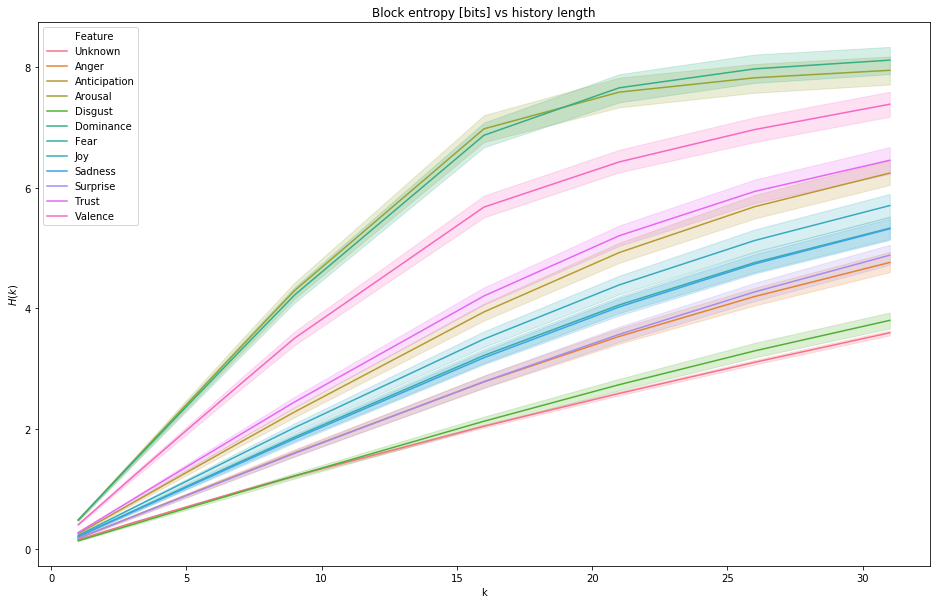

In [39]:
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Feature')
plt.title('Block entropy [bits] vs history length')
plt.show()

In [41]:
dflim = df[df.k == df.k.max()].sort_values(by=ENT_RATE)
dflim.head()

$H(k)$  Category  \
Document                                     Subject                       
EN_1893_Gissing,George_TheOddWomen_Novel     miss nunn     0.0  Response   
EN_1927_Woolf,Virginia_TotheLighthouse_Novel NARRATOR      0.0  Response   
EN_1920_DosPassos,John_ThreeSoldiers_Novel   andy          0.0  Response   
                                             andy          0.0  Response   
EN_1881_James,Henry_PortraitofaLady_Novel    child         0.0  Response   

                                                        Feature  Unnamed: 0  \
Document                                     Subject                          
EN_1893_Gissing,George_TheOddWomen_Novel     miss nunn  Sadness        1529   
EN_1927_Woolf,Virginia_TotheLighthouse_Novel NARRATOR      Fear          62   
EN_1920_DosPassos,John_ThreeSoldiers_Novel   andy       Disgust         665   
                                             andy          Fear         683   
EN_1881_James,Henry_PortraitofaLady_Novel    child      Disgust         872   

                                                         k      n  $h^{(k)}$  \
Document                                     Subject                           
EN_1893_Gissing,George_TheOddWomen_Novel     miss nunn  31  28147        0.0   
EN_1927_Woolf,Virginia_TotheLighthouse_Novel NARRATOR   31  13496        0.0   
EN_1920_DosPassos,John_ThreeSoldiers_Novel   andy       31  27990        0.0   
                                             andy       31  27990        0.0   
EN_1881_James,Henry_PortraitofaLady_Novel    child      31  47190        0.0   

                                                        $\eta^{(k)}$  \
Document                                     Subject                   
EN_1893_Gissing,George_TheOddWomen_Novel     miss nunn           0.0   
EN_1927_Woolf,Virginia_TotheLighthouse_Novel NARRATOR            0.0   
EN_1920_DosPassos,John_ThreeSoldiers_Novel   andy                0.0   
                                             andy                0.0   
EN_1881_James,Henry_PortraitofaLady_Novel    child               0.0   

                                                       reliability  
Document                                     Subject                
EN_1893_Gissing,George_TheOddWomen_Novel     miss nunn    Reliable  
EN_1927_Woolf,Virginia_TotheLighthouse_Novel NARRATOR     Reliable  
EN_1920_DosPassos,John_ThreeSoldiers_Novel   andy         Reliable  
                                             andy         Reliable  
EN_1881_James,Henry_PortraitofaLady_Novel    child        Reliable

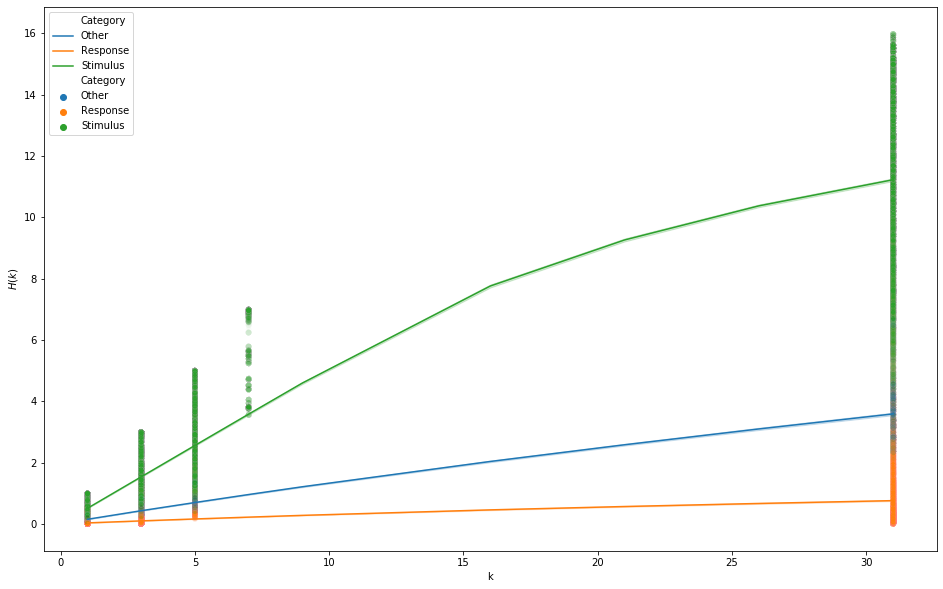

In [42]:
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Category')
sns.scatterplot(data=df[reliable], x='k', y=BLOCK_ENT, hue='Category', alpha=.02)

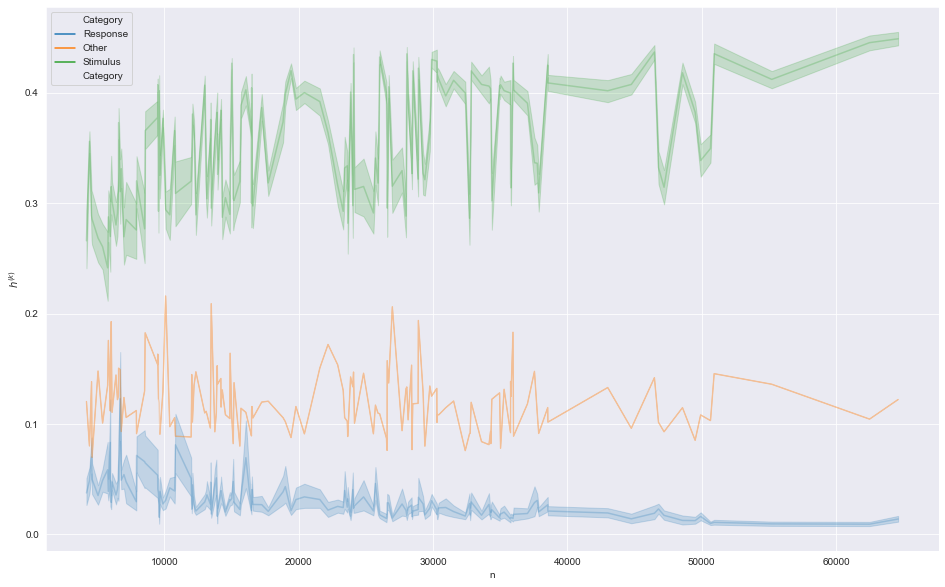

In [49]:
reliable_lim = dflim.reliability == 'Reliable'
sns.set_style("darkgrid")
sns.lineplot(data=dflim[reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.25)
sns.lineplot(data=dflim[~reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.025)
#sns.lineplot(data=dflim[reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.25)

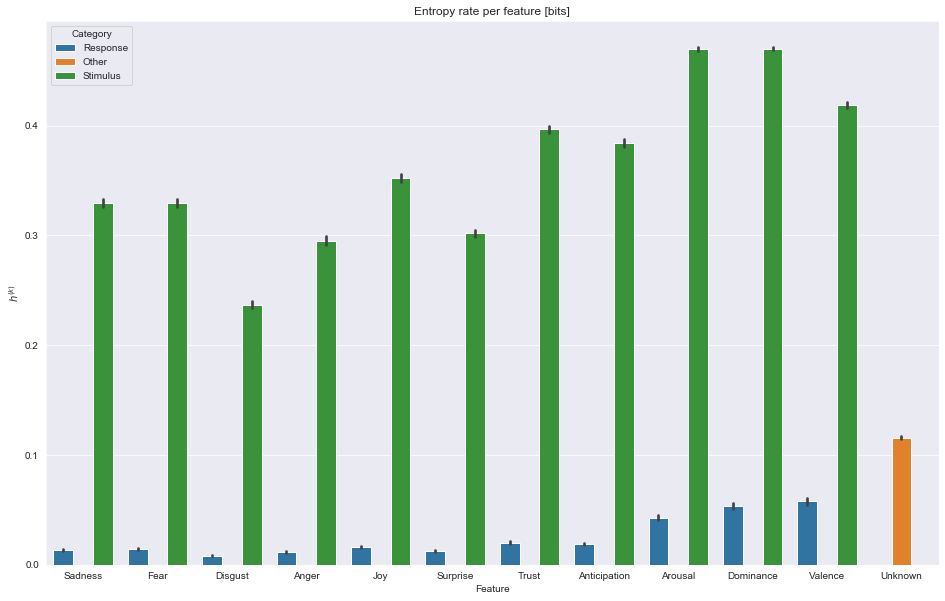

In [44]:
plt.title('Entropy rate per feature [bits]')
sns.barplot(data=dflim, x='Feature', y=ENT_RATE, hue='Category')

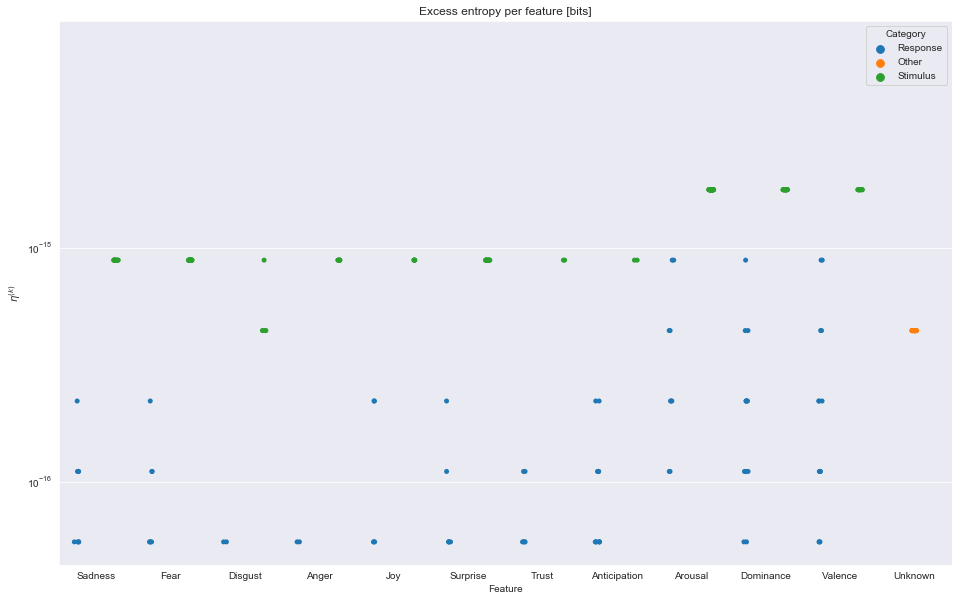

In [45]:
plt.title('Excess entropy per feature [bits]')
plt.yscale('log')
sns.stripplot(data=dflim, x='Feature', y=EXCESS_ENT, hue='Category', dodge=True, jitter=True)

In [ ]:
def entropy(series):
    
mcsr.groupby(['Subject', 'Document']).apply(lambda d: d.replace(0, np.nan).rolling(5).count())

In [ ]:
    from pyinform.blockentropy import block_entropy

    x = (np.random.random([100]) > .5).astype(np.uint8)
    for k in range(1, 50):
        print(k, block_entropy(x, k))